### HAMLET

## Characters as NODES
## Gender as ATTRIBUTE

1. Hamlet, Prince of Denmark, son of King Hamlet.
2. Claudius, King of Denmark, uncle of Hamlet, and brother of King Hamlet.
3. Ghost of the old King Hamlet, the deceased king.
4. Gertrude, the queen, Hamlet's mother, who has married Claudius.
5. Polonius, counselor of state.
6. Laertes, son of Polonius.
7. Ophelia, daughter of Polonius, engaged to Hamlet.
8. Horatio, trusted friend of Hamlet.
9. Rosencrantz and Guildenstern, courtiers, former university companions of Hamlet.
10. Fortinbras, Prince of Norway.
11. Voltimand and Cornelius, Danish counselors, ambassadors to Norway.
12. Marcellus, Bernardo, Francisco: Guards of the King.
13. Osric, a courtier.
14. Reynaldo, servant of Polonius.
15. Actors.
16. A courtier.
17. A priest.
18. Two gravediggers.
19. The gravedigger's companion.
20. A captain, messenger of Fortinbras.
21. Ambassadors from England.
22. Ladies, gentlemen, officers, soldiers, sailors, messengers, and servants.

         Character  Gender Role Place
0           Hamlet    Male           
1    King Claudius    Male           
2      King Hamlet    Male           
3   Queen Gertrude  Female           
4         Polonius    Male           
5          Laertes    Male           
6          Ophelia  Female           
7          Horatio    Male           
8      Rosencrantz    Male           
9     Guildenstern    Male           
10      Fortinbras    Male           
11       Voltimand    Male           
12       Cornelius    Male           
13       Marcellus    Male           
14        Bernardo    Male           
15       Francisco    Male           
16           Osric    Male           
17        Reynaldo    Male           
18          Actors    Male           


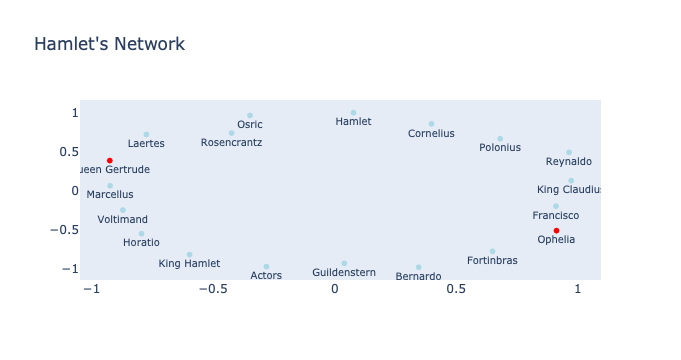

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle

# Dizionario
genere_dict = {
 "Hamlet": "Male",
    "King Claudius": "Male",
    "King Hamlet": "Male",
    "Queen Gertrude": "Female",
    "Polonius": "Male",
    "Laertes": "Male",
    "Ophelia": "Female",
    "Horatio": "Male",
    "Rosencrantz": "Male",
    "Guildenstern": "Male",
    "Fortinbras": "Male",
    "Voltimand": "Male",
    "Cornelius" : "Male",
    "Marcellus": "Male",
    "Bernardo": "Male",
    "Francisco": "Male",
    "Osric": "Male",
    "Reynaldo":"Male",
    "Actors": "Male"  
}

# Creazione del DataFrame
attributes_df = pd.DataFrame(list(genere_dict.items()), columns=['Character', 'Gender'])

# Aggiunta delle colonne vuote 'role' e 'place'
attributes_df = attributes_df.assign(Role='', Place='')

# Visualizzazione del DataFrame aggiornato
print(attributes_df)

# Salvataggio in un file CSV
attributes_df.to_csv('dataset/attributes.csv', index=False)


# Creazione del grafo
G = nx.Graph()


# Aggiunta dei nodi (personaggi) con attributi di genere, luogo e descrizione
for idx, character in enumerate(attributes_df['Character']):
    gender = attributes_df['Gender'][idx]
    role = attributes_df['Role'][idx]
    place = attributes_df['Place'][idx]
    G.add_node(character, gender=gender, role=role, place=place)


# Creazione del layout del grafo
pos = nx.spring_layout(G, seed=42)


# Creazione del grafico Plotly
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(x=(x0, x1, None), y=(y0, y1, None), mode='lines', line=dict(width=0.5), hoverinfo='none'))


node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color=['red' if G.nodes[node]['gender'] == 'Female' else 'lightblue' for node in G.nodes()]
    ),
    text=[node for node in G.nodes()],
    textposition='bottom center',
    textfont=dict(size=10),
    customdata=[[f"Character: {node}<br>Gender: {G.nodes[node]['gender']}<br>Place: {G.nodes[node]['place']}<br>Role: {G.nodes[node]['role']}"] for node in G.nodes()]
)


fig = go.Figure(edge_trace + [node_trace])
fig.update_traces(
    hovertemplate='%{customdata}',  # Visualizza gli attributi al passaggio del mouse
)


fig.update_layout(showlegend=False, title="Hamlet's Network")
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

nx.write_gexf(G, 'graphs/initial_graph.gexf')

1. Relazioni familiari tra personaggi:

Re Claudio: Fratello del defunto re (padre di Amleto), attuale re di Danimarca. x
Regina Gertrude: Moglie di Re Claudio, madre di Amleto. x
Amleto: Figlio del defunto re, principe di Danimarca. x
Polonio: Ciambellano, padre di Laerte e Ofelia. x
Laerte: Figlio di Polonio, fratello di Ofelia.  x
Ofelia: Figlia di Polonio, sorella di Laerte, interesse amoroso di Amleto. x

Fortebraccio: Padre di Fortebraccio (figlio), menzionato come avversario del defunto re in un duello.

2. Interazioni e dialoghi tra personaggi:

Amleto e Orazio: Condividono le informazioni sul fantasma, pianificano l'incontro e la conversazione con lo spettro.
Amleto e Ofelia: Dialogo in cui Amleto, influenzato dalle rivelazioni dello spettro, respinge Ofelia e la consiglia di diventare suora.
Re Claudio e Polonio: Dialogo sullo stato di Amleto e sospetto riguardo alle azioni del principe.
Amleto e Rosencrantz/Guildenstern: Interazione con gli amici di università, con Amleto che sospetta la loro lealtà.
Amleto e attori: Amleto consiglia agli attori di rappresentare "L'assassinio di Gonzago" per verificare la colpevolezza del re.
Amleto e Polonio: Amleto uccide Polonio per errore, scambiandolo per il re durante un confronto con la madre.
Laerte e Re Claudio: Laerte accusa il re della morte di Polonio e chiede giustizia.
Orazio e Amleto: Orazio informa Amleto delle notizie sulla nave e del ritorno imminente in Danimarca.
Laerte e Ofelia: Laerte si scontra con Ofelia, entrambi afflitti dalla morte di Polonio.

3. Co-occorrenza nella stessa scena:

Consiglio reale: Re Claudio, Regina Gertrude, Amleto, Polonio, Laerte, ambasciatori Cornelio e Voltimando, altri presenti.
Dialogo tra Amleto e Orazio sulle mura di Elsinora.
Incontro tra Amleto e Ofelia nei giardini del castello.
Riunione tra Rosencrantz, Guildenstern e Amleto per indagare sulla sua malinconia.
Scena del teatro con l'interpretazione de "L'assassinio di Gonzago".
Incontro tra Amleto e Laerte durante il funerale di Ofelia.
Duello finale tra Amleto e Laerte sotto la supervisione del re.
Scena del confronto finale con la morte di vari personaggi, tra cui il re, Laerte e Amleto.






Nodi di Interazioni:

Dialoghi diretti:

Arco tra Amleto e Orazio
Arco tra Amleto e Ofelia
Arco tra Re Claudio e Polonio
Arco tra Amleto e Rosencrantz/Guildenstern
Arco tra Amleto e attori
Arco tra Amleto e Polonio
Arco tra Laerte e Re Claudio
Arco tra Orazio e Amleto
Arco tra Laerte e Ofelia


Nodi di Co-occorrenza:

Scene specifiche:

Arco tra Consiglio reale e Re Claudio, Regina Gertrude, Amleto, Polonio, Laerte, ambasciatori Cornelio e Voltimando, altri presenti.
Arco tra Scene del teatro e Amleto, attori, altri spettatori.
Arco tra Funerale di Ofelia e Amleto, Laerte, Orazio, altri partecipanti.
Arco tra Duello finale e Amleto, Laerte, Re Claudio, Orazio, altri presenti.
Arco tra Confronto finale e Amleto, Laerte, Re Claudio, altri personaggi chiave.

Relazioni temporali:
Arco tra Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
Arco tra Notte dell'incontro e Amleto, Orazio, Sentinella, Marcello.
Arco tra Incontro sulle mura e Amleto, Orazio, Sentinella.
Arco tra Giorno del funerale e Laerte, Amleto, Re Claudio, Ofelia.

Rappresentazioni teatrali:
Arco tra Scena del teatro e Amleto, attori, altri spettatori.
Arco tra L'assassinio di Gonzago e Amleto, attori, altri spettatori.

Corrispondenza e informazioni:
Arco tra Lettera di Amleto e Orazio, corriere, Re Claudio.
Arco tra Informazioni sulla nave e Orazio, Amleto, altri.

In [26]:
import numpy as np
import pandas as pd
import networkx as nx

# Lista dei personaggi unici
characters = ["Hamlet",
    "King Claudius",
    "King Hamlet",
    "Queen Gertrude",
    "Polonius",
    "Laertes",
    "Ophelia",
    "Horatio",
    "Rosencrantz",
    "Guildenstern",
    "Fortinbras",
    "Voltimand",
    "Cornelius",
    "Marcellus",
    "Bernardo",
    "Francisco",
    "Osric",
    "Reynaldo",
    "Actors"]

# Creazione di matrici di adiacenza per relazioni, co-occorrenze e interazioni
relationships_matrix = np.zeros((len(characters), len(characters)), dtype=int)
cooc_matrix = np.zeros((len(characters), len(characters)), dtype=int)
interactions_matrix = np.zeros((len(characters), len(characters)), dtype=int)

# DataFrame per rappresentare le matrici di adiacenza
relationships_df = pd.DataFrame(relationships_matrix, index=characters, columns=characters)
cooc_df = pd.DataFrame(cooc_matrix, index=characters, columns=characters)
interactions_df = pd.DataFrame(interactions_matrix, index=characters, columns=characters)

# Popolamento delle matrici di adiacenza in base alle relazioni, co-occorrenze e interazioni

# Ad esempio, se Amleto e Re Amleto hanno una relazione, incrementa il valore corrispondente nella matrice relazioni
relationships_df.loc['Hamlet', 'King Hamlet'] += 1 #type: fatherhood
relationships_df.loc['Hamlet', 'Queen Gertrude'] += 1 #type: motherhood
relationships_df.loc['Hamlet', 'King Claudius'] += 1 #type: unclehood
relationships_df.loc['Hamlet', 'Ophelia'] += 1 #type: relationship
relationships_df.loc['King Claudius', 'Queen Gertrude'] += 1 #type: marriage
relationships_df.loc['King Claudius', 'King Hamlet'] += 1 #type: brotherhood
relationships_df.loc['Polonius', 'Laertes'] += 1 #son
relationships_df.loc['Polonius', 'Ophelia'] += 1 #daughter
relationships_df.loc['Laertes', 'Ophelia'] += 1 #brotherhood
relationships_df.loc['Queen Gertrude', 'King Hamlet'] += 1 #ex husband
relationships_df.loc['Hamlet', 'Horatio'] += 1 #friendship


#Interazioni
interactions_df.loc['Hamlet', 'Horatio'] += 2 #Condividono le informazioni sul fantasma, pianificano l'incontro e la conversazione con lo spettro, Orazio e Amleto: Orazio informa Amleto delle notizie sulla nave e del ritorno imminente in Danimarca.
interactions_df.loc['Hamlet', 'Ophelia'] += 1 #Dialogo in cui Amleto, influenzato dalle rivelazioni dello spettro, respinge Ofelia e la consiglia di diventare suora.
interactions_df.loc['King Claudius', 'Polonius'] += 1 #Dialogo sullo stato di Amleto e sospetto riguardo alle azioni del principe.
interactions_df.loc['Hamlet', 'Rosencrantz'] += 1 #Interazione con gli amici di università, con Amleto che sospetta la loro lealtà.
interactions_df.loc['Hamlet', 'Guildenstern'] += 1  #Interazione con gli amici di università, con Amleto che sospetta la loro lealtà.                
interactions_df.loc['Hamlet', 'Actors'] += 1 #Amleto consiglia agli attori di rappresentare "L'assassinio di Gonzago" per verificare la colpevolezza del re.
interactions_df.loc['Hamlet', 'Polonius'] += 1 #Amleto uccide Polonio per errore, scambiandolo per il re durante un confronto con la madre.
interactions_df.loc['Laertes', 'King Claudius'] += 1 #Laerte accusa il re della morte di Polonio e chiede giustizia.
interactions_df.loc['Laertes', 'Ophelia'] += 1 #Laerte e Ofelia: Laerte si scontra con Ofelia, entrambi afflitti dalla morte di Polonio.

#Cooccorrenze
cooc_df.loc['King Claudius', 'Queen Gertrude'] += 1 #Kingdom Council
cooc_df.loc['King Claudius', 'Hamlet'] += 3 #Kingdom Council, Duello finale tra Amleto e Laerte sotto la supervisione del re, Scena del confronto finale con la morte di vari personaggi, tra cui il re, Laerte e Amleto.
cooc_df.loc['King Claudius', 'Polonius'] += 1 #Kingdom Council
cooc_df.loc['King Claudius', 'Laertes'] += 3 #Kingdom Council, Duello finale tra Amleto e Laerte sotto la supervisione del re, Scena del confronto finale con la morte di vari personaggi, tra cui il re, Laerte e Amleto.
cooc_df.loc['King Claudius', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['King Claudius', 'Voltimand'] += 1 #Kingdom Council
cooc_df.loc['Queen Gertrude', 'Hamlet'] += 1 #Kingdom Council
cooc_df.loc['Queen Gertrude', 'Polonius'] += 1 #Kingdom Council
cooc_df.loc['Queen Gertrude', 'Laertes'] += 1 #Kingdom Council
cooc_df.loc['Queen Gertrude', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['Queen Gertrude', 'Voltimand'] += 1 #Kingdom Council
cooc_df.loc['Hamlet', 'Polonius'] += 1 #Kingdom Council
cooc_df.loc['Hamlet', 'Laertes'] += 4 #Kingdom Council, #Incontro tra Amleto e Laerte durante il funerale di Ofelia, Duello finale tra Amleto e Laerte sotto la supervisione del re, Scena del confronto finale con la morte di vari personaggi, tra cui il re, Laerte e Amleto.
cooc_df.loc['Hamlet', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['Hamlet', 'Voltimand'] += 1 #Kingdom Council
cooc_df.loc['Polonius', 'Laertes'] += 1 #Kingdom Council
cooc_df.loc['Polonius', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['Polonius', 'Voltimand'] += 1 #Kingdom Council
cooc_df.loc['Laertes', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['Laertes', 'Voltimand'] += 1 #Kingdom Council
cooc_df.loc['Voltimand', 'Cornelius'] += 1 #Kingdom Council
cooc_df.loc['Hamlet', 'Horatio'] += 2, #Dialogo tra Amleto e Orazio sulle mura di Elsinora, Incontro tra Amleto e Laerte durante il funerale di Ofelia
cooc_df.loc['Hamlet', 'Ophelia'] += 1 #Incontro tra Amleto e Ofelia nei giardini del castello.
cooc_df.loc['Hamlet', 'Rosencrantz'] += 1  #Riunione tra Rosencrantz, Guildenstern e Amleto per indagare sulla sua malinconia.
cooc_df.loc['Hamlet', 'Guildenstern'] += 1 #Riunione tra Rosencrantz, Guildenstern e Amleto per indagare sulla sua malinconia.
cooc_df.loc['Rosencrantz', 'Guildenstern'] += 1  #Riunione tra Rosencrantz, Guildenstern e Amleto per indagare sulla sua malinconia.
cooc_df.loc['King Hamlet', 'Horatio'] += 1 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['King Hamlet', 'Marcellus'] += 1 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['King Hamlet', 'Bernardo'] += 1 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['King Hamlet', 'Francisco']  += 1 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Horatio', 'Marcellus'] += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Horatio', 'Bernardo'] += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Horatio', 'Francisco']  += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Marcellus', 'Bernardo'] += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Marcellus', 'Francisco'] += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Bernardo', 'Francisco']  += 2 #Fantasma e Orazio, Marcello, Sentinella, altri presenti durante l'apparizione.
cooc_df.loc['Hamlet', 'Marcellus'] += 1 # Incontro sulle mura e Amleto, Orazio, Sentinella.
cooc_df.loc['Hamlet', 'Bernardo'] += 1 #Incontro sulle mura e Amleto, Orazio, Sentinella.
cooc_df.loc['Hamlet', 'Francisco']  += 1 #Incontro sulle mura e Amleto, Orazio, Sentinella.

# Esporta i DataFrame in file CSV se necessario
relationships_df.to_csv('dataset/relazioni_matrix_amleto.csv')
cooc_df.to_csv('dataset/cooc_matrix_amleto.csv')
interactions_df.to_csv('dataset/interazioni_matrix_amleto.csv')


#Corrispondenza e informazioni:
#Arco tra Lettera di Amleto e Orazio, corriere, Re Claudio.
#Arco tra Informazioni sulla nave e Orazio, Amleto, altri.

## EDGES: 

1. RELATIONSHIPS
2. INTERACTIONS
3. CO-OCCURRENCE

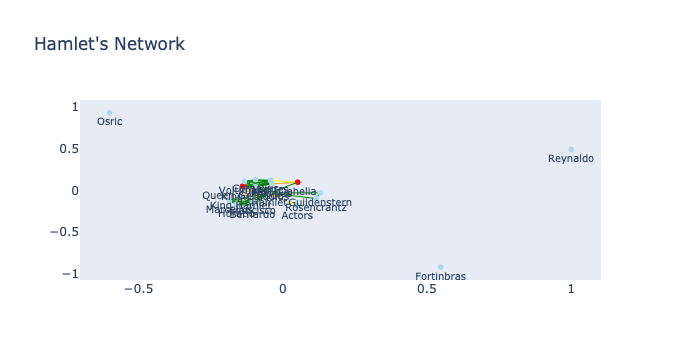

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the existing graph
G = nx.read_gexf('graphs/initial_graph.gexf')

# Load your three datasets
relationships_df = pd.read_csv('dataset/relazioni_matrix_amleto.csv', index_col=0)
cooc_df = pd.read_csv('dataset/cooc_matrix_amleto.csv', index_col=0)
interactions_df = pd.read_csv('dataset/interazioni_matrix_amleto.csv', index_col=0)

# Function to add edges of different types to the graph
def add_edges_from_dataframe(G, df, edge_color):
    for row in df.iterrows():
        source, targets = row[0], row[1][row[1] > 0].index.tolist()
        for target in targets:
            G.add_edge(source, target, color=edge_color)

# Add edges for relationships (orange)
add_edges_from_dataframe(G, relationships_df, 'orange')

# Add edges for interactions (yellow)
add_edges_from_dataframe(G, interactions_df, 'yellow')

# Add edges for co-occurrences (green)
add_edges_from_dataframe(G, cooc_df, 'green')

# Visualize the graph
pos = nx.spring_layout(G, seed=42)

edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=1, color=edge[2]['color']),
        hoverinfo='none'
    ))

node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color=['red' if G.nodes[node].get('gender', 'Unknown') == 'Female' else 'lightblue' for node in G.nodes()]
    ),
    text=[node for node in G.nodes()],
    textposition='bottom center',
    textfont=dict(size=10),
    customdata=[[f"Character: {node}<br>Gender: {G.nodes[node].get('gender', 'Unknown')}<br>Place: {G.nodes[node].get('place', 'Unknown')}<br>Role: {G.nodes[node].get('role', 'Unknown')}"] for node in G.nodes()]
)

fig = go.Figure(edge_trace + [node_trace])
fig.update_traces(
    hovertemplate='%{customdata}',  # Display attributes on hover
)

fig.update_layout(showlegend=False, title="Hamlet's Network")
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
nx.write_gexf(G, 'graphs/new_graph.gexf')


### Visualizzazione

In [ ]:
import networkx as nx
from networkx.readwrite import graphml
from networkx.readwrite import pajek

# Carica il grafo da un file Gephi
gephi_file_path = "graphs/new_graph.gexf"  # Sostituisci con il percorso del tuo file Gephi
G = nx.read_gexf(gephi_file_path)  # Puoi utilizzare anche read_gml o read_graphml a seconda del formato di esportazione da Gephi

# Esporta il grafo in formato GraphML (o altro formato supportato da SocNetV)
graphml_file_path = "graphs/grafo_convertito.graphml"  # Puoi scegliere un nome per il tuo nuovo file
nx.write_graphml(G, graphml_file_path)

# Esporta il grafo in formato Pajek (opzionale, a seconda delle esigenze di SocNetV)
pajek_file_path = "graphs/grafo_convertito.net"  # Puoi scegliere un nome per il tuo nuovo file
nx.write_pajek(G, pajek_file_path)